In [1]:
from pylab import *
import numpy as np
import matplotlib, pylab
from dcll.npamlib import plotLIF
from dcll.pytorch_libdcll import *
import os.path as path

matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['savefig.dpi']=400.
matplotlib.rcParams['font.size']=14.0
matplotlib.rcParams['figure.figsize']=(5.0,3.5)
matplotlib.rcParams['axes.formatter.limits']=[-10,10]
matplotlib.rcParams['axes.labelsize']= 14.
matplotlib.rcParams['figure.subplot.bottom'] = .2
matplotlib.rcParams['figure.subplot.left'] = .2       

In [23]:
all_layers_folder_id = range(1, 21, 2)
skip_first_folder_id = range(2, 21, 2)
base_folder = "../Paper_results/{:03d}__01-10-2018"
all_layers_folders = [
    base_folder.format(n) for n in all_layers_folder_id
]
skip_first_folders = [
    base_folder.format(n) for n in skip_first_folder_id
]
print(list(all_layers_folder_id))
print(list(skip_first_folder_id))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


In [65]:
import pickle
def plot_accuracy(directories, skip_first=False):
    args = np.load(path.join(directories[0], "args"))
    batch_size = args.batch_size
    n_test_interval = args.n_test_interval
    
    acc_test = [ np.load(path.join(d, "acc_test.npy")) for d in directories ]
    acc_test = np.array(acc_test)
    n_epoch = acc_test.shape[1]
    n_layers = acc_test.shape[3]
    
    
    parameters = pickle.load(open(path.join(directories[0], 'parameters_{}.pkl'.format(n_epoch-1)), 'rb'))
    n_weights = 0
    n_bias = 0
    for k, v in parameters.items():
        if skip_first and k.startswith('layer1'):
            continue
        elif k.endswith('.i2h.weight'):
            n_weights += v.size
        elif k.endswith('.i2h.bias'):
            n_bias +=v.size            
    print("number of trained weights: {} bias: {}".format(n_weights, n_bias))
    print("number of test samples: {}".format(acc_test.shape[2] * batch_size))
    

    test_epochs = np.arange(0, n_epoch, n_test_interval, dtype='int') + 1
    # mean over the multiple test batches
    weighted_acc = np.mean(acc_test, axis=2)
    # mean over the multiple runs with different seeds
    mean_acc = np.mean(weighted_acc, axis=0)
    std_acc = np.std(weighted_acc, axis=0)
    
    print("Accuracy: {}".format(mean_acc[:, -1]))
    
    fig = figure()
    ax = subplot(111)
    n_updates_tick = 1
    x = test_epochs*batch_size//n_updates_tick
    
    for l in range(n_layers):
        if skip_first and l==0:
             linestyle='--'
        else:
            linestyle='-'
        ax.plot(x, 1-mean_acc[:,l],
                linewidth=3, linestyle=linestyle,
                alpha=.75, label = 'Layer {}'.format(l+1))
        ax.fill_between(x, 1-mean_acc[:,l] - std_acc[:,l], 1-mean_acc[:,l] + std_acc[:,l],
                       alpha=.2)
        
    ax.set_yticks(np.arange(0,1.1,0.1))
    ax.grid()
    legend()
    ax.set_ylabel('Error[%]')
    ax.set_xlabel('Training Samples [{}]'.format(n_updates_tick))
    tight_layout()
    ax.set_ylim([0,1.])
    ax.set_xlim(batch_size, n_epoch*batch_size // n_updates_tick)
    savefig(path.join(path.dirname(directories[0]), 'convergence_mnist_skip{}.png'.format(skip_first)), dpi=300, frameon=False)

# Accuracy of the network

number of trained weights: 57232 bias: 72
number of test samples: 1536
Accuracy: [0.47929688 0.7811849  0.915625   0.953125   0.9703125  0.97675781
 0.9796875  0.98886719 0.9859375  0.9984375  0.971875   0.99375
 0.9906901  0.9921224  0.99095052 0.9953125  0.996875   0.996875
 0.9922526  0.9953125  0.9984375  0.99375    0.996875   0.9985026
 0.996875   0.9953125  0.9953125  0.9890625  0.9921875  0.9984375 ]


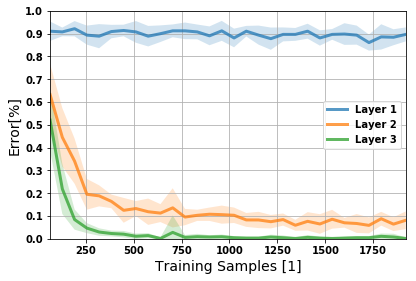

In [66]:
plot_accuracy(all_layers_folders)

# Accuracy of the network when first layer is disabled

number of trained weights: 56448 bias: 56
number of test samples: 1536
Accuracy: [0.77949219 0.95325521 0.97200521 0.98151042 0.9875651  0.9921875
 0.9953125  0.996875   0.996875   1.         0.9984375  1.
 0.9953125  0.99479167 0.9984375  1.         1.         1.
 0.9953125  1.         1.         1.         0.9985026  1.
 0.9984375  0.996875   0.996875   0.9984375  1.         0.9984375 ]


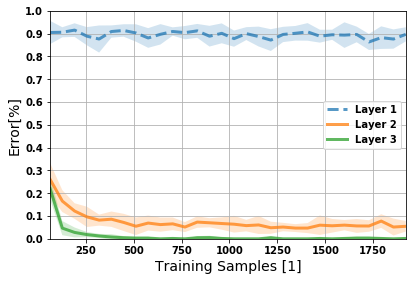

In [67]:
plot_accuracy(skip_first_folders, skip_first=True)

In [31]:
acc_test = [ np.load(path.join(d, "acc_test.npy")) for d in all_layers_folders ]
acc_test = np.array(acc_test)

In [9]:
acc_test

array([[[[0.078125, 0.3125  , 0.359375],
         [0.078125, 0.3125  , 0.359375],
         [0.078125, 0.3125  , 0.359375],
         ...,
         [0.078125, 0.3125  , 0.359375],
         [0.078125, 0.3125  , 0.359375],
         [0.078125, 0.3125  , 0.359375]],

        [[0.0625  , 0.5625  , 0.78125 ],
         [0.0625  , 0.5625  , 0.78125 ],
         [0.0625  , 0.5625  , 0.78125 ],
         ...,
         [0.0625  , 0.5625  , 0.796875],
         [0.0625  , 0.5625  , 0.796875],
         [0.0625  , 0.5625  , 0.796875]],

        [[0.140625, 0.53125 , 0.90625 ],
         [0.140625, 0.53125 , 0.90625 ],
         [0.140625, 0.53125 , 0.90625 ],
         ...,
         [0.140625, 0.53125 , 0.90625 ],
         [0.140625, 0.53125 , 0.90625 ],
         [0.140625, 0.53125 , 0.90625 ]],

        ...,

        [[0.15625 , 0.9375  , 1.      ],
         [0.15625 , 0.9375  , 1.      ],
         [0.15625 , 0.9375  , 1.      ],
         ...,
         [0.15625 , 0.9375  , 1.      ],
         [0.15625 , 0.

In [10]:
acc_test.shape

(10, 30, 24, 3)

In [12]:
np.mean(acc_test, axis=2).shape

(10, 30, 3)

In [27]:
all_layers_folders[0]

'../Paper_results/001__01-10-2018'